ML Capstone Project - Finding variables/parameters affecting Attrition in a company based on various data

In [225]:
#Reading csv file

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("HR_Employee_Attrition_Data.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Finding correlated columns to reduce data by removing one of the correlated columns
data.corr()

# From below table - Correlated columns are - JobLevel and TotalWorkingYears, MonthlyIncome & TotalWorkingYears, 
#YearsWithCurrManager & YearsAtCompany, YearsInCurrentRole & YearsAtCompany

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.005175,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.025742,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.016464,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.020950,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005175,-0.025742,0.016464,0.020950,NaN,1.000000,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.008712,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.017377,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.003552,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.009020,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


#Dropping one of the Correlated columns

In [5]:
data.drop('TotalWorkingYears', inplace=True, axis=1)

In [6]:
data.drop('YearsAtCompany', inplace=True, axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,11,3,1,80,0,0,1,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,23,4,4,80,1,3,3,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,15,3,2,80,0,3,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,11,3,3,80,0,3,3,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,17,3,3,80,1,3,3,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,15,3,1,80,1,5,3,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,20,4,2,80,1,0,3,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,14,3,4,80,0,3,2,6,0,8


In [87]:
#Dropping unnecessary columns

data.drop('Over18', inplace=True, axis=1)
data.drop('EmployeeNumber', inplace=True, axis=1)

In [86]:
data['EmployeeCount'].var()

#EmployeeCount column has Zero Variance , hence remove

0.0

In [88]:
data.drop('EmployeeCount', inplace=True, axis=1)

In [7]:
# Finding columns having Nan/null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [177]:
data.apply(lambda x: x.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [180]:
names = list(data.columns.values)
names_index = names[2:]

In [8]:
#Finding variance of all columns, check for column with Zero variance and remove
data.var()

C:\Users\HP\AppData\Local\Temp\ipykernel_22504\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Age                         8.342665e+01
DailyRate                   1.627642e+05
DistanceFromHome            6.569889e+01
Education                   1.048557e+00
EmployeeCount               1.233015e-32
EmployeeNumber              7.205450e+05
EnvironmentSatisfaction     1.194422e+00
HourlyRate                  4.131450e+02
JobInvolvement              5.061470e-01
JobLevel                    1.224899e+00
JobSatisfaction             1.215856e+00
MonthlyIncome               2.215732e+07
MonthlyRate                 5.064564e+07
NumCompaniesWorked          6.237926e+00
PercentSalaryHike           1.339059e+01
PerformanceRating           1.301493e-01
RelationshipSatisfaction    1.168615e+00
StandardHours               0.000000e+00
StockOptionLevel            7.257876e-01
TrainingTimesLastYear       1.661653e+00
WorkLifeBalance             4.989383e-01
YearsInCurrentRole          1.312266e+01
YearsSinceLastPromotion     1.038052e+01
YearsWithCurrManager        1.272726e+01
dtype: float64

In [9]:
#Remove StandardHours as it has zero variance

data.drop('StandardHours', inplace=True, axis=1)

In [19]:
#5 point summary

data.describe()

# Mean and 50%(median) are almost close for most columns, hence no outliers

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
data.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7


In [63]:
#Encoding non-numerical data

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
data['Attrition']= label_encoder.fit_transform(data['Attrition'])
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int32

In [89]:
data['BusinessTravel']= label_encoder.fit_transform(data['BusinessTravel'])
data['Department']= label_encoder.fit_transform(data['Department'])
data['EducationField']= label_encoder.fit_transform(data['EducationField'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['JobRole']= label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus']= label_encoder.fit_transform(data['MaritalStatus'])
data['OverTime']= label_encoder.fit_transform(data['OverTime'])
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,1,884,1,23,2,3,3,1,...,3,80,1,17,3,3,5,2,0,3
2936,39,0,2,613,1,6,1,3,4,1,...,1,80,1,9,5,3,7,7,1,7
2937,27,0,2,155,1,4,3,1,2,1,...,2,80,1,6,0,3,6,2,0,3
2938,49,0,1,1023,2,2,3,3,4,1,...,4,80,0,17,3,2,9,6,0,8


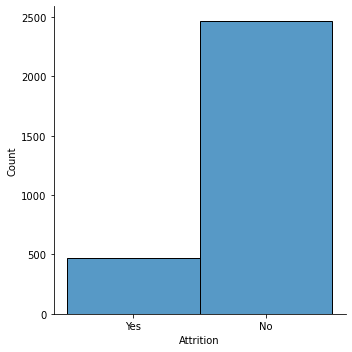

In [51]:
sns.displot(data['Attrition'])

#Total employees count is close to 2500, count of employees leaving the company is close to 500

<AxesSubplot:xlabel='Age', ylabel='Density'>

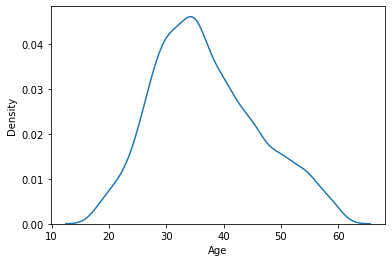

In [45]:
sns.kdeplot(data['Age'])

#Maximum employees' age range is between 28-42

<AxesSubplot:xlabel='Age', ylabel='count'>

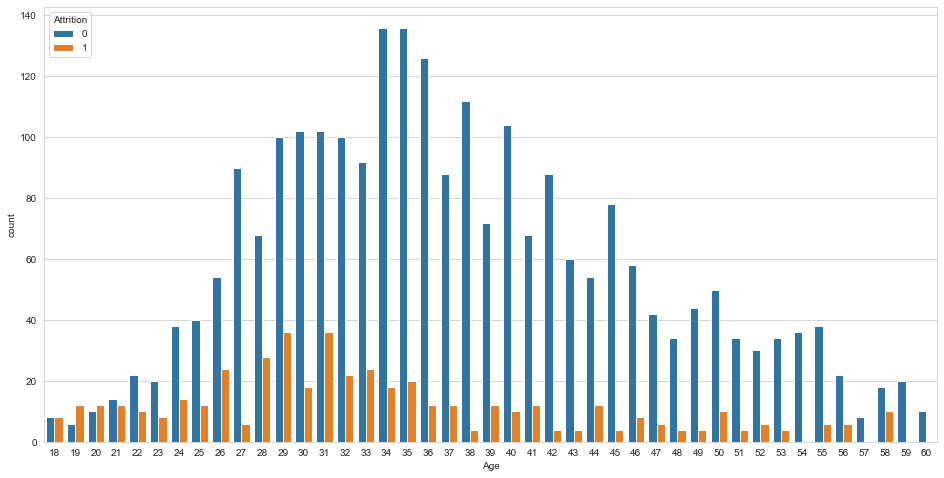

In [67]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = data['Age'],hue = data['Attrition'], data = data)

# Most of the employees of age between 26-33 are leaving the company

<AxesSubplot:xlabel='Department', ylabel='count'>

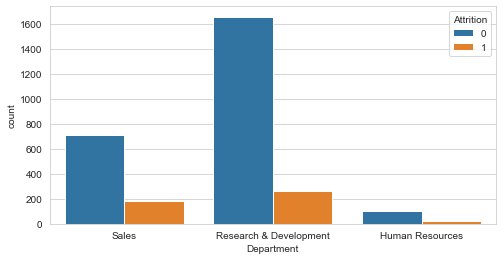

In [85]:
plt.figure(figsize = (8, 4))
sns.countplot(x = data['Department'], hue = data['Attrition'], data = data)

#From below plot - Highest attrition is in Research & Development Department, followed by Sales

<AxesSubplot:xlabel='Gender', ylabel='count'>

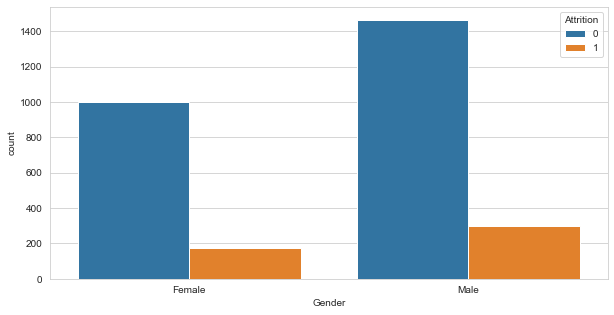

In [81]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x = data['Gender'],hue = data['Attrition'], data = data)

#From below plot - Male count of attrition is higher than female

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

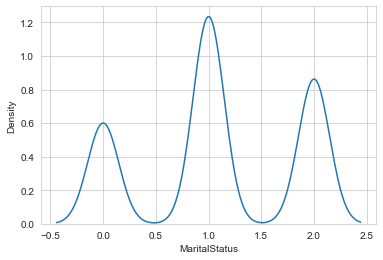

In [100]:
sns.kdeplot(data['MaritalStatus'], x = (0,1,2))

# Highest number of employees' MaritalStatus is 1. 1 means Married

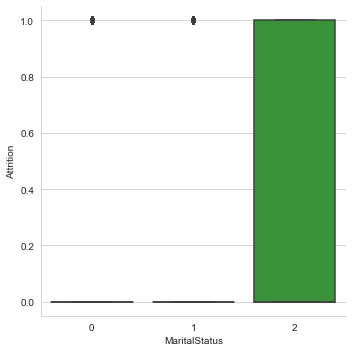

In [94]:
sns.catplot(data=data, x="MaritalStatus", y="Attrition",kind="box")

# MaritalStatus 2 means Single. Single (unmarried) employees are high in Attrition (resigning the most)

In [96]:
data['MaritalStatus']

0       2
1       1
2       2
3       1
4       1
       ..
2935    1
2936    1
2937    1
2938    1
2939    1
Name: MaritalStatus, Length: 2940, dtype: int32

In [101]:
data['BusinessTravel']

0       2
1       1
2       2
3       1
4       2
       ..
2935    1
2936    2
2937    2
2938    1
2939    2
Name: BusinessTravel, Length: 2940, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

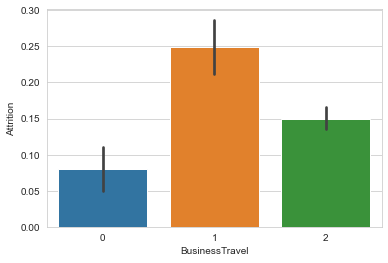

In [104]:
sns.barplot(data=data, x="BusinessTravel", y="Attrition")

# From below plot, attrition is high in employees travelling frequently, followed by employees who travel rarely

<AxesSubplot:xlabel='EducationField', ylabel='Attrition'>

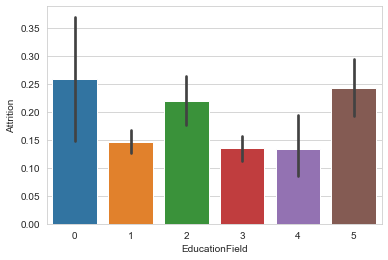

In [105]:
sns.barplot(data=data, x="EducationField", y="Attrition")

# Education fields - 0 = Human resources, 1 = Life Sciences, 2 = Marketing, 3 = Medical, 4 = Other, 5 = Technical Degree

# From below plot, we see that Attrition is high for employees educated in Hr, followed by TechDegree, followed by Marketing

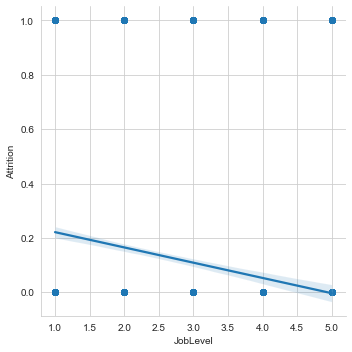

In [110]:
sns.lmplot(x = 'JobLevel', y = 'Attrition', data=data)

# From below plot, we see that Attrition is higher for lower job levels and vice-versa

<AxesSubplot:xlabel='JobRole', ylabel='Attrition'>

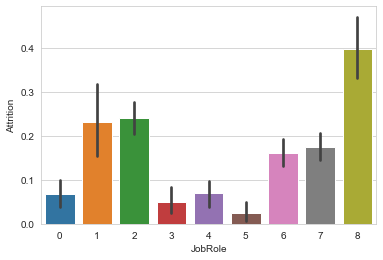

In [111]:
sns.barplot(data=data, x="JobRole", y="Attrition")

#From below plot, we see that attrition is high for employees with Job role = 8 = Sales Representative. 
#Then Laboratory Technician followed by Human Resources

In [117]:
data['JobRole'].head(80)

0     7
1     6
2     2
3     6
4     2
     ..
75    4
76    7
77    5
78    5
79    1
Name: JobRole, Length: 80, dtype: int32

In [90]:
# Standardizing/Normalizing/Scaling data to avoid dominance issues by any variable that have higher values 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

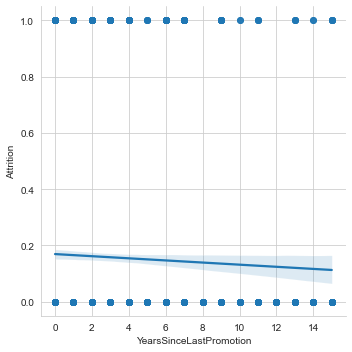

In [118]:
sns.lmplot(x = 'YearsSinceLastPromotion', y = 'Attrition', data=data)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

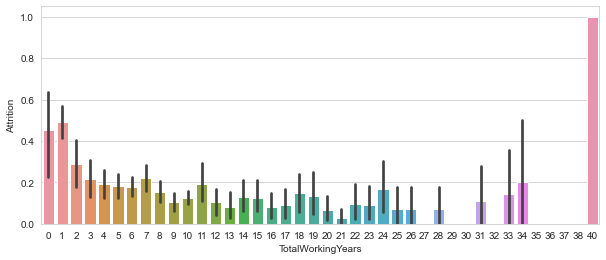

In [122]:
plt.figure(figsize = (10, 4))
sns.barplot(data=data, x="TotalWorkingYears", y="Attrition")

# Making final Random Forest model

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting data for training model and testing model. Both training and testing data are further split considering the target variable
feature_space = data.iloc[:,data.columns!='Attrition']
feature_target = data.iloc[:,data.columns == 'Attrition']

training_set, test_set, target_set, test_target_set = train_test_split(feature_space, feature_target, test_size = 0.20, random_state=42)
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [142]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

# To flatten the target data (for all data to have same data-type)
target_set = target_set.values.ravel()
test_target_set = test_target_set.values.ravel()

In [145]:
# Using GridSearchCV to find the best parameters for Random Forest Classifier

import time

np.random.seed(42)
start = time.time()
param_dist = {'max_depth':[2,3,4], 'bootstrap': [True, False], 'max_features':['auto','sqrt','log2',None], 'criterion':['gini','entropy']}
cv_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs = 3)
cv_rf.fit(training_set, target_set)
print('Best Parameters: ', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search : ', format(end-start))

Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search :  97.09915947914124


In [165]:
# Initialising fit_rf as an instance of RandomForestClassifier

fit_rf = RandomForestClassifier(random_state=42)

# Setting the RF classifier parameters with the best parmeter values given by GridSearchCV
fit_rf.set_params(bootstrap = True, criterion = 'gini', max_depth = 4, max_features = None)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

C:\Users\HP\AppData\Local\Temp\ipykernel_22504\884207781.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_rf.fit(training_set, target_set)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_22504\884207781.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_rf.fit(training_set, target_set)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_22504\884207781.p

Text(0, 0.5, 'OOB Error Rate')

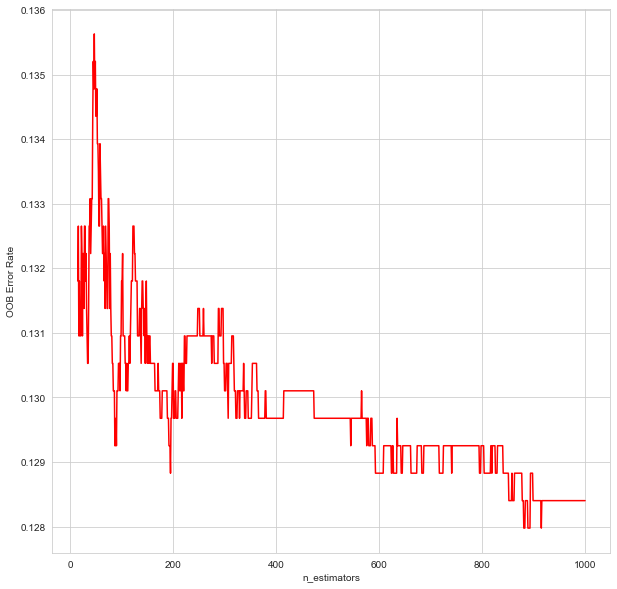

In [166]:
#Finding OOB (Out Of Bag) Error Rate

fit_rf.set_params(warm_start = True, oob_score = True)
min_estimators = 15
max_estimators = 1000
error_rate = {}

for i in range(min_estimators, max_estimators+1):
    fit_rf.set_params(n_estimators = i)
    fit_rf.fit(training_set, target_set)
    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error
    
oob_series = pd.Series(error_rate)

plt.subplots(figsize=(10, 10))

oob_series.plot(kind = 'line', color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')

From the above OOB error series plot, we can derive that 500 would be the ideal number of trees to consider for RF. It's giving 
the least OOB error rate with stable fluctuations.

In [168]:
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

OOB Error rate for 500 trees is: 0.12968


In [169]:
# Updating the parameters for RF classifier

fit_rf.set_params(n_estimators = 500, warm_start=False, oob_score=False)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=500,
                       random_state=42)

In [226]:
# Fitting the training dataset into RF classifier
fit_rf.fit(training_set, target_set)

C:\Users\HP\AppData\Local\Temp\ipykernel_22504\915546138.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_rf.fit(training_set, target_set)


RandomForestClassifier(max_depth=4, max_features=None, n_estimators=500,
                       random_state=42)

In [228]:
# Finding the important predictor variables that affect the target variable(Attrition)

importances = fit_rf.feature_importances_
indices = np.argsort(importances)[::-1]

imp_rf = importances
ind_rf = indices

for f in range(0, indices.shape[0]):
    i = f
    names_index[indices[i]]
    importances[indices[f]]

IndexError: list index out of range

In [202]:
# Finding Area Under the Curve (AUC)

pred_rf = fit_rf.predict_proba(test_set)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(test_target_set, pred_rf)

roc_auc = auc(fpr_rf, tpr_rf)

In [203]:
predictions_rf = fit_rf.predict(test_set)

Text(0.5, 1.0, 'ROC Curve For Random Forest: (AUC = 0.875)')

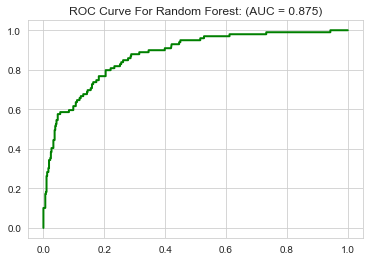

In [206]:
plt.plot(fpr_rf, tpr_rf, color = 'green', lw = 2)
plt.title('ROC Curve For Random Forest: (AUC = {0:.3f})'\
              .format(roc_auc))

# 87.5% True positive results are predicted correctly

In [197]:
# Confusion matrix

print(confusion_matrix(test_target_set, predictions_rf))

# 485+17 / 588 i.e., 502/588*100 i.e., 85.37% results are predicted accurately. Hence, it is a good performing model.

[[485   4]
 [ 82  17]]


In [199]:
# Accuracy check of the model

accuracy_rf = fit_rf.score(test_set, test_target_set)
print("Mean accuracy on the test set is: \n {0:.3f}"\
      .format(accuracy_rf))

Mean accuracy on the test set is: 
 0.854


In [224]:
# Test error rate of the model

test_errorRate_rf = 1 - accuracy_rf
print("The test error rate for this model is:\n {0: .4f}"\
      .format(test_errorRate_rf))

The test error rate for this model is:
  0.1463


In [230]:
#data['Attrition'] = data['Attrition'].map({1:'Yes', 0:'No'})
dx = list(data['Attrition'].unique())

print('Classification Report for Random Forest')
print(classification_report(predictions_rf, test_target_set, target_names = dx))

#f1-score for Yes is high, which means the model is better

Classification Report for Random Forest
              precision    recall  f1-score   support

         Yes       0.99      0.86      0.92       567
          No       0.17      0.81      0.28        21

    accuracy                           0.85       588
   macro avg       0.58      0.83      0.60       588
weighted avg       0.96      0.85      0.90       588

